# CS 109A/STAT 121A/AC 209A/CSCI E-109A

## Standard Section 4: Predictor types and feature selection

**Harvard University**<br/>
**Fall 2017**<br/>
**Section Leaders: Nathaniel Burbank, Albert Wu<br/>**
**Instructors: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine** 

<center>**Download this notebook from the CS109 repo or here:**</center>
<center>**http://bit.ly/109_S4**</center>

For this section, our goal is to continue discussing the complexities around different types of data features and how the issues to consider when building a model for inference or prediction. 

Specifically, we will: 
    
    1. Review how to plot multiple axes on a single plot in Matplotlib
    2. Discuss different variable types, and techniques of “one-hot-encoding” our factor variables 
    3. Build a variable selection function that performs an exhaustive feature search overall all possible combinations of predictors 
 

For this section we will be using the following packages:

In [1]:
import sys
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 999)
pd.set_option('display.width', 500)
pd.set_option('display.notebook_repr_html', True)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# Note --  Requires sklearn version .18 or higher  
from sklearn import metrics, datasets
from collections import Counter
import statsmodels.formula.api as sm
from statsmodels.api import OLS
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

matplotlib.rcParams['figure.figsize'] = (13.0, 6.0)

assert(sys.version_info.major==3),print(sys.version)
# Python 3 or higher is required

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Part (1): Review plotting on multiple axes within a single matplot lib figure

![](https://i.imgur.com/XTzSuoR.png)
source: http://matplotlib.org/faq/usage_faq.html

## Plot y1 and y2 on single figure 

In [2]:
x = np.arange(0, 10, 0.2)
y1 = np.sin(x)
y2 = np.exp(x)

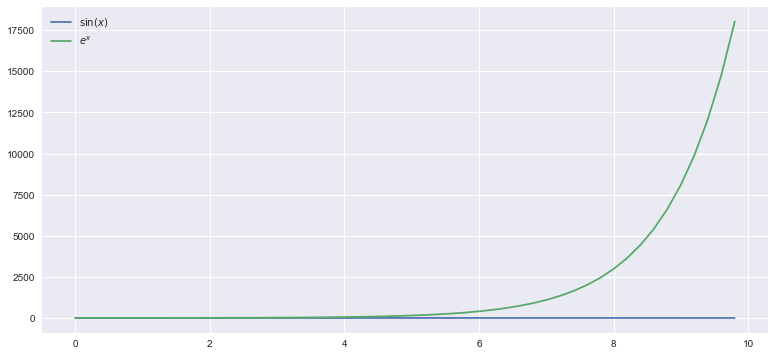

In [4]:
## Your code here 
plt.plot(x, y1, label='$\sin(x)$')
plt.plot(x, y2, label='$e^x$')
plt.legend()
plt.show()

## Plot y1 and y2 on side by side axes

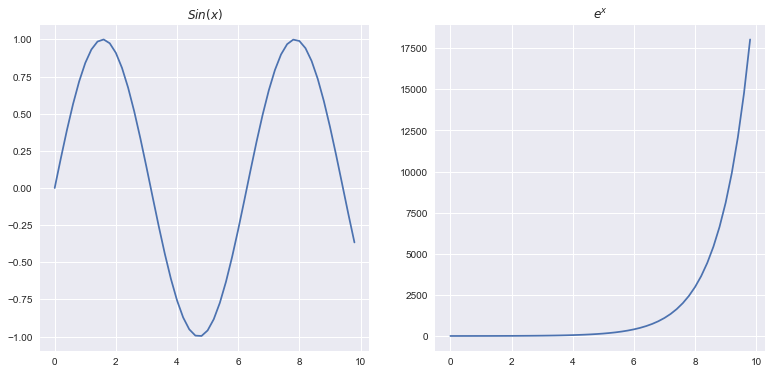

In [6]:
## Your code here 
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(x,y1)
ax1.set_title('$Sin(x)$')

ax2 = fig.add_subplot(122)
ax2.plot(x, y2)
ax2.set_title('$e^x$')
plt.show()

In [ ]:
# Two subplots, unpack the axes array immediately

## Your code here 



plt.show()

## Plot y1 and y2 on separate (stacked) axes sharing the same x-axis 

In [ ]:
# Two subplots, the axes array is 1-d

## Your code here 

plt.show()

## Four axes, returned as a 2-d array

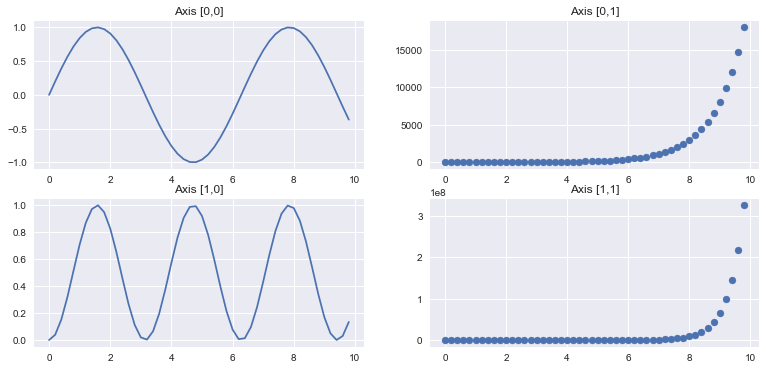

In [7]:
# Four axes, returned as a 2-d array
f, axarr = plt.subplots(2, 2)
axarr[0, 0].plot(x, y1)
axarr[0, 0].set_title('Axis [0,0]')
axarr[0, 1].scatter(x, y2)
axarr[0, 1].set_title('Axis [0,1]')
axarr[1, 0].plot(x, y1 ** 2)
axarr[1, 0].set_title('Axis [1,0]')
axarr[1, 1].scatter(x, y2 ** 2)
axarr[1, 1].set_title('Axis [1,1]')
plt.show()

## Part (2): Logistic regression on Titanic data set 

Note: In this part we’ll be using **logistic regression** to predict the likelihood of different passengers surviving the titanic disaster. We have not discussed logistic regression much in class, but for now it’s enough to know that logistic regression is typically preferable to linear regression when the outcome variable we’re predicting falls into discreet categories (in this case survived or didn’t survived) rather than a continuous range. 

First let's load the dataset... 

In [ ]:
titanic = sns.load_dataset("titanic")
titanic.head()

In [ ]:
# Subset to only cols we want
titanic = titanic[['sex', 'age', 'fare', 'class', 'survived']]

# Rename 'class' col to 'pclass' to avoid namespace issues
titanic.columns = ['sex', 'age', 'fare', 'pclass', 'survived']

#Drop any NA values in dataframe
titanic = titanic.dropna()

titanic.head()

## Next, let’s start ploting out data with box plots

In [ ]:
sns.boxplot(y="age",x="survived",hue="sex",data=titanic)
plt.show()

Age does not seem to be particularly informative. But there is something going on with gender?

In [ ]:
sns.barplot(x="sex", y="survived", data=titanic)
plt.show()

If we group by passenger class, we get an even more complete picture. 

In [ ]:
sns.barplot(x="sex", y="survived", hue='pclass', data=titanic)
plt.show()

## Define a series ‘is_female’, with 1s for women and 0s for men 

In [ ]:
is_female = ## Your code here 
is_female.head()

## "One hot encode" the passenger class column, and return a Dataframe with cols for 'First' and 'Second'

Why don’t we want to keep all three columns? 

In [ ]:
pclass_coded = ## Your code here 
pclass_coded.head()

## Make a single dataframe with the encoded columns, plus 'age', 'fare' and 'survived' from the original dataframe. 

In [ ]:
titanic_c = ## Your code here 
titanic_c.head()

## Use train_test_split to divided our dataset in a 80% training set, and a 20% testing set. 

In [ ]:
train, test =  train_test_split(titanic_c, test_size=.2, random_state=123)
train.shape,test.shape

## Fit a logistic regression model and print the summary statistics. Do all the predictors seem significant?  

In [ ]:
model = sm.logit(formula="survived ~ female + First + Second + age + fare", data=train)
model = model.fit()
model.summary()

Hmm…it seems like the fare predictor is not really helpful in our model. What’s going on?

In [ ]:
ax = sns.boxplot(titanic.fare,titanic.pclass)
ax.set_xlim([0,250])

Ah, it’s clearly highly correlated with passenger class. Let’s drop it for now.

In [ ]:
model = sm.logit(formula="survived ~ female + First + Second + age", data=train)
model = model.fit()
model.summary()

## Let’s test our model on the set-aside test set. 

In [ ]:
predicted = np.round(model.predict(test[['female','First','Second','age']]))
expected = test['survived']
print(metrics.classification_report(expected, predicted))

In [ ]:
pd.crosstab(expected,predicted)

## Part (3) Model Selection via exhaustive search selection

The data set for this problem contains 10 predictors and a response variable.

Import the data...

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/nathanielburbank/CS109/master/data/sec4_dataset.txt')
data.head()

By visually inspecting the data set, do we find that some of the predictors are correlated amongst themselves?

In [ ]:
## Your code here 

Compute the cofficient of correlation between each pair of predictors, and visualize the matrix of correlation coefficients using a heat map. Do the predictors fall naturally into groups based on the correlation values?

In [ ]:
## Your code here 

In [ ]:
## Your code here 

If you were asked to select a minimal subset of predictors based on the correlation information in order to build a good regression model, how many predictors will you pick, and which ones will you choose? 

## Review Model Selection Criterion


### Bayesian Information Criterion (BIC)

– Generally BIC = -2 x Log-likehood + 2 x log(K)

– For least-squares regression specifically: 

$$BIC = n \log \Big(\frac{RSS}{n}\Big) + \log(n)*K$$

Where:
RSS = Residual Sum of Squares

n = the number of obervations 

K = the number of features in our model
    

### Part (b): Selecting minimal subset of predictors

- Apply the Exhaustive search variable selection methods discussed in class to choose a minimal subset of predictors that yield high prediction accuracy. Use the Bayesian Information Criterion (BIC) to choose the subset size.

In [ ]:
import itertools

def exhaustive_search_selection(x, y):
    """Exhaustively search predictor combinations. .

    Parameters:
    -----------
    x : DataFrame of predictors/features
    y : response varible 
    
    
    Returns:
    -----------
    
    OLS Model with lowest BIC for subset with highest R^2
    
    """
    
    # total no. of predictors
    d = x.shape[1]
    predictors = x.columns
    overall_min_bic = 10000 # A big number 
    output = dict()
    
    # Outer loop: iterate over sizes 1 .... d
    for k in range(1,d):
        
        max_r_squared = -10000 # A small number
        
        # Enumerate subsets of size ‘k’
        subsets_k = itertools.combinations(predictors, k)
        
        # Inner loop: iterate through subsets_k
        for subset in subsets_k:
            # Fit regression model using ‘subset’ and calculate R^2 
            # Keep track of subset with highest R^2
            
            features = list(subset)
            x_subset = x[features]
            
            model = OLS(y, x_subset)
            results = model.fit()
            r_squared = results.rsquared
            
            # Check if we get a higher R^2 value than than current max R^2, 
            # if so, update our best subset 
            if(r_squared > max_r_squared):
                max_r_squared = r_squared
                best_subset = features
                best_model = model
                best_formula = "y ~ {}".format(' + '.join(features))
        
        results = best_model.fit()
        bic = results.bic
        if bic < overall_min_bic:
            overall_min_bic = bic 
            best_overall_subset = best_subset
            best_overall_rsquared = results.rsquared
            best_overall_formula = best_formula
            best_overall_model = best_model
        
        #print("For k={0} the best model is {1} with bic={2:.2f} and R^2={3:.4f}".format(k,best_formula,bic,results.rsquared))
        output[k] = {'best_model':best_formula, 'bic':bic,'r_squared':results.rsquared}
        
    print("The best overall model is {0} with bic={1:.2f} and R^2={2:.3f}".format(best_overall_formula,overall_min_bic, best_overall_rsquared))
    
    return pd.DataFrame(output).T,best_overall_model     

In [ ]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1:]
stats,model = exhaustive_search_selection(x,y)
stats

In [ ]:
model.fit().summary()

Do the chosen subsets match the ones you picked using the correlation matrix you had visualized in Part (a)?